# Praktikums-Competition: Predict the correct house prices!

## Fiktiver Auftrag
Eine Online-Platform für den Kauf und Verkauf von Wohnungen möchte eine App entwickeln um mehr mögliche Verkäufer\*Innen anzuziehen. Die App soll aus einigen Kerndaten einer Wohnung verlässlich den
Verkaufspreis vorhersagen. 


Alle bekommen
- `house_price_data.csv` einen Datensatz mit den Featuren/Variablen zu verschiedenen Häusern sowie dem Label (hier: Hauspreis). Damit können Modelle trainiert und getestet werden.
- `house_price_data_unknown.csv` ist ein Datensatz mit Häusern bei denen der Preis nicht bekannt ist.

## Ziel: Die Hauspreise bestmöglich vorhersagen
Alle Teams sollen zum Schluss ihre Preis-Vorhersagen für die Häuser in `house_price_data_unknown.csv` abgegeben. Nach der Abgabe werden die Vorhersagen mit den tatsächlichen Werten verglichen (über MAE, mean absolute error). Das Team mit den genausten Vorhersagen (laut MAE-Wert) gewinnt :)

In [85]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', 100)

# Los gehts... Daten importieren & erkunden

- Wie immer mit `pd.read_csv` die Daten importieren (`house_price_data.csv`)
- Die Spalte `price` enthält unser Label (oder: Zielvariable).
- Gibt es fehlende Werte?
- Gibt es Ausreißer / falsche / merkwürdige Einträge

--> `.describe()` & `.info()`

In [86]:
filename = "data/house_price_data.csv"  # wie immer: Ordner anpassen wenn nötig

data = pd.read_csv(filename)

In [87]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5420300210,258000.0,3,1.75,2090,7461,1.0,0,0,3,6,1200,890,1986,0,98030,47.3764,-122.184,1420,7462
1,629000510,1185000.0,4,2.75,3020,8622,2.0,0,0,3,9,3020,0,1976,2003,98004,47.5866,-122.201,3060,14303
2,1338801060,560000.0,4,1.50,1810,3400,2.0,0,0,3,8,1810,0,1926,0,98112,47.6264,-122.302,1770,3600
3,7338000150,160000.0,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
4,1441000090,485000.0,4,3.50,3273,5115,2.0,0,0,3,8,2671,602,2014,0,98055,47.4477,-122.204,2996,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9276200569,769900.0,4,3.50,2730,3047,2.0,0,0,3,8,2400,330,2006,0,98116,47.5797,-122.391,1980,4600
9996,8079030390,446500.0,3,2.50,2650,7286,2.0,0,0,3,8,2650,0,1990,0,98059,47.5084,-122.154,2400,7220
9997,8691410100,735000.0,5,2.75,3390,5211,2.0,0,0,3,9,3390,0,2004,0,98075,47.5977,-121.981,3210,5211
9998,324000370,502000.0,3,1.00,1710,5000,1.0,0,0,5,7,1140,570,1921,0,98116,47.5719,-122.385,1670,4000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   price          10000 non-null  float64
 2   bedrooms       10000 non-null  int64  
 3   bathrooms      10000 non-null  float64
 4   sqft_living    10000 non-null  int64  
 5   sqft_lot       10000 non-null  int64  
 6   floors         10000 non-null  float64
 7   waterfront     10000 non-null  int64  
 8   view           10000 non-null  int64  
 9   condition      10000 non-null  int64  
 10  grade          10000 non-null  int64  
 11  sqft_above     10000 non-null  int64  
 12  sqft_basement  10000 non-null  int64  
 13  yr_built       10000 non-null  int64  
 14  yr_renovated   10000 non-null  int64  
 15  zipcode        10000 non-null  int64  
 16  lat            10000 non-null  float64
 17  long           10000 non-null  float64
 18  sqft_li

In [89]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.613472e+09,5.385561e+05,3.360900,2.109625,2076.158600,1.506738e+04,1.494400,0.007300,0.234100,3.398800,7.651800,1788.642900,287.515700,1971.342500,81.621900,98077.697400,47.559925,-122.211507,1981.223900,12777.594300
std,2.878744e+09,3.533016e+05,0.911337,0.768072,918.446593,4.016195e+04,0.543965,0.085132,0.766522,0.647611,1.180549,823.392012,442.101782,29.175001,395.287081,53.419386,0.137368,0.142087,682.254754,26635.666711
min,1.200021e+06,8.000000e+04,0.000000,0.000000,370.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,620.000000,651.000000
25%,2.131076e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.099250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470275,-122.326000,1480.000000,5120.000000
50%,3.992700e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571550,-122.227000,1840.000000,7626.500000
75%,7.338952e+09,6.420000e+05,4.000000,2.500000,2550.000000,1.065050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.677400,-122.123000,2360.000000,10120.500000
max,9.842301e+09,3.850000e+06,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,560617.000000


## Grafischer Überblick (mittels Verteilungen)

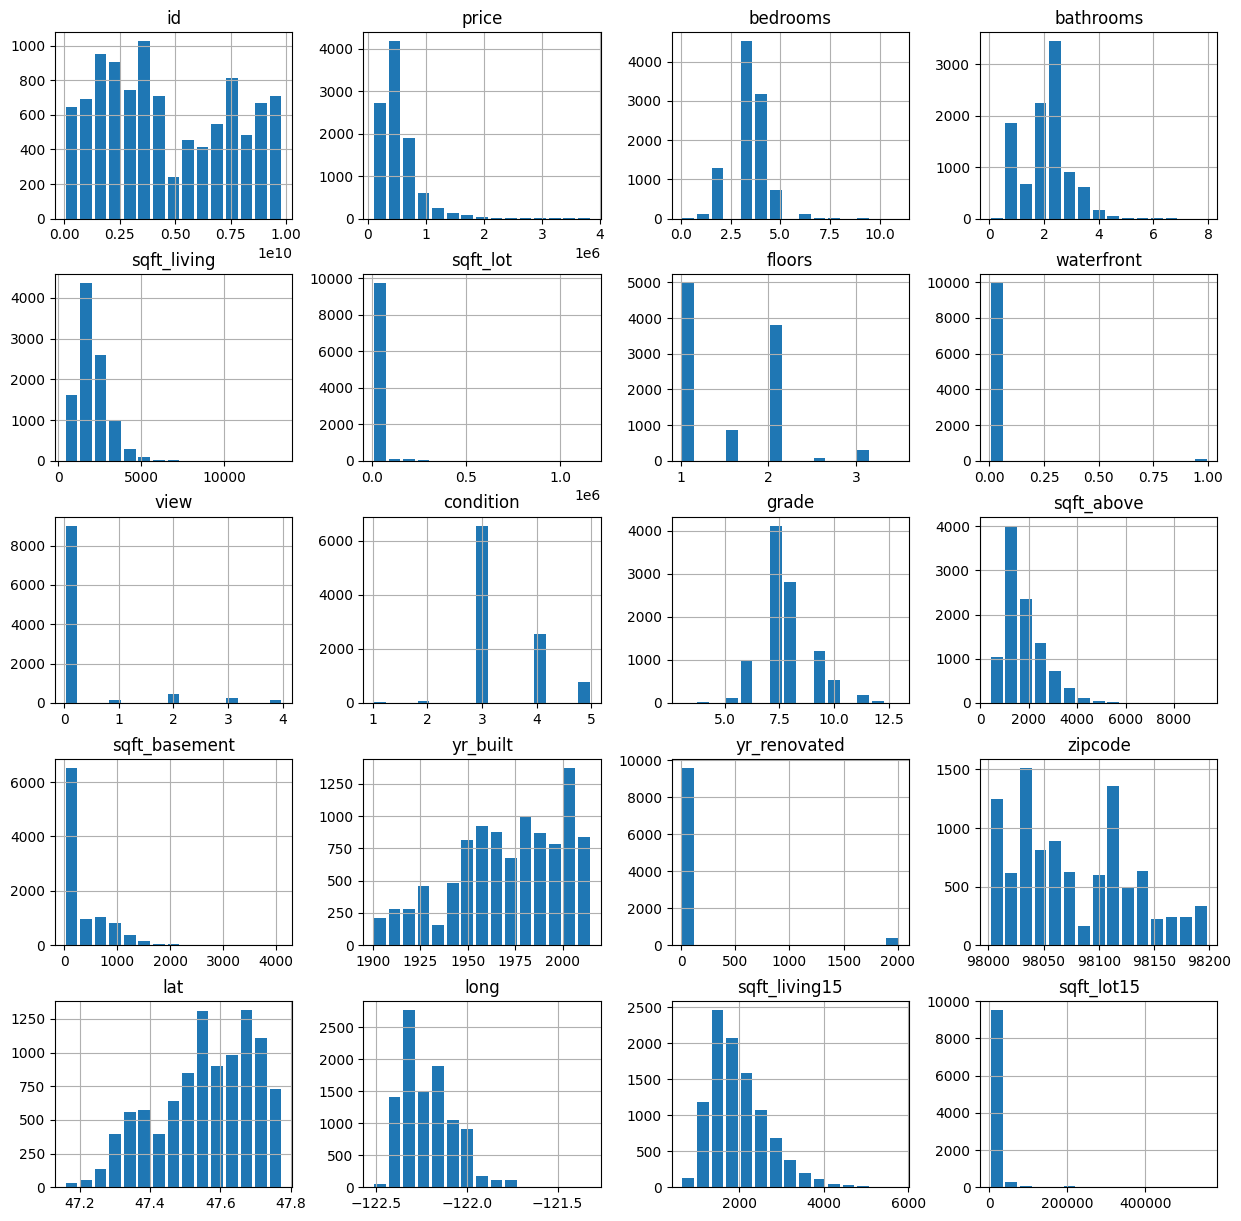

In [90]:
data.hist(figsize=(15, 15), bins=15, rwidth=0.8)
plt.show()

## Korrelationen?

- Gibt es Kollinearitäten, also Variablen die mit (nahezu) 1 korrelieren? Falls ja, müssen wir diese entfernen?
- Welche Variablen hängen scheinbar stark mit dem Preis zusammen?

<AxesSubplot: >

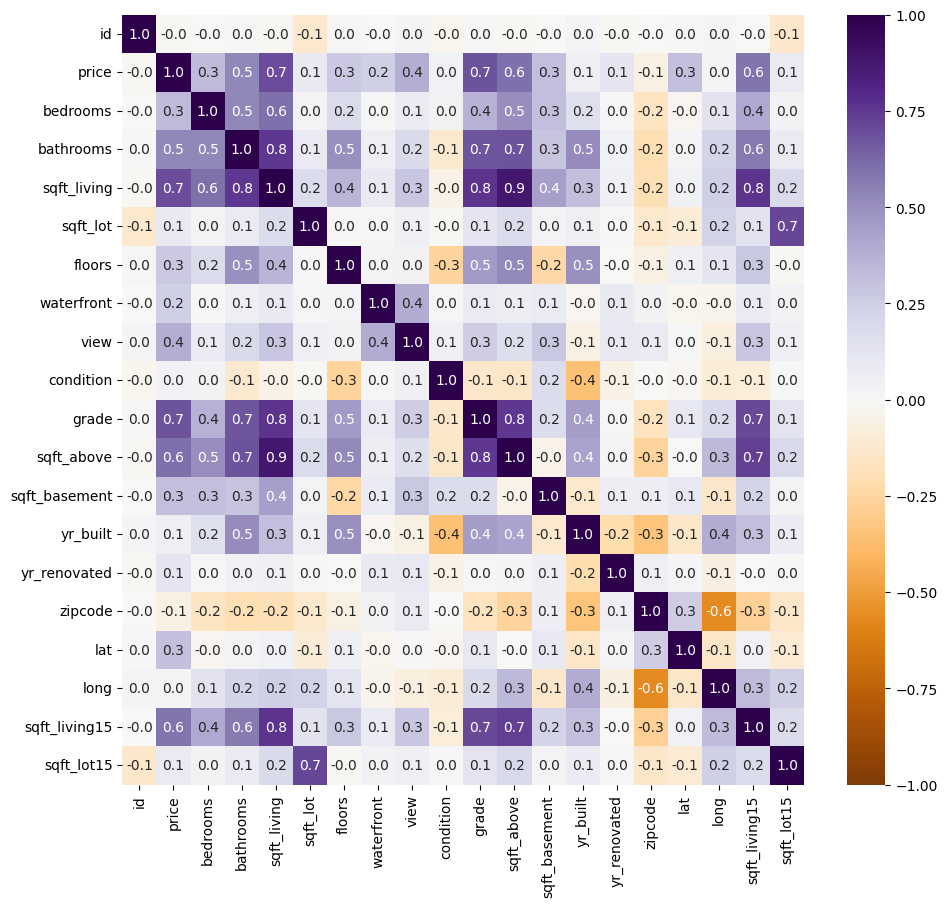

In [91]:
fig, ax = plt.subplots(figsize=(11, 10))

sb.heatmap(data.corr(),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

# Data cleaning & Aufteilung data --> X, y
- Fehlende Werte entfernen (falls vorhanden)
- Spalten die von den Machine Learning Modellen nicht genutzt werden sollen entfernen.  
(z.B. mit `.drop(..., axis=1)`)
- Spalten die Kategorien enthalten eventuell umwandeln (je nach Modell).
- Aufteilen der Daten in `X` (ohne das Label) und `y` (nur die Label)

In [92]:
data.set_index("id", inplace=True) 

In [93]:
y = data["price"]
X = data.drop("price", axis=1)

In [94]:
from sklearn.preprocessing import StandardScaler

# Scale x and y with standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [96]:
y_test

id
524069037     505000.0
2770602135    607500.0
7856610130    840000.0
8945300110    196000.0
3275850180    675000.0
                ...   
7715800570    385000.0
2719100240    850000.0
3764500090    655000.0
8886000021    445000.0
2618300190    255000.0
Name: price, Length: 2000, dtype: float64

# Suche nach dem "richtigen" Modell...

Es geht hier um ein Regressions-Modell. Dafür kommen viele in Frage! Siehe z.B. https://scikit-learn.org/stable/supervised_learning.html

Mögliche Kandidaten wären etwa:

- `sklearn.linear_model import LinearRegression`
- `sklearn.tree.DecisionTreeRegressor`
- `sklearn.neighbors.KNeighborsRegressor`
- `sklearn.ensemble.RandomForestRegressor`

**Achtung: Bitte keine der neuronalen Netzwerke von Scikit-Learn verwenden.**

## Warnung: Einige der Modelle können eventuell viel Zeit für Training (oder auch die Vorhersage) benötigen.
(Daher im Team besser auf mehreren Rechnern arbeiten)


---

## Kurzanleitung zum Umgang mit den Scikit-Learn Modellen

### Allgemeiner Ablauf: Initialisieren, Trainieren, Vorhersagen
Die Modelle in Scikit-Learn werden immer nach dem gleichen Prinzip ausgeführt.

1) Objekt erzeugen: `my_model = SomeFancyModel(parameter1=4, ...)`  
2) Modell trainieren: `my_model.fit(X, y)`  
3) Vorhersagen machen: `my_model.predict(X_new)`

### Modell parameter - welche gibt es?

Wir bekommen eine Liste mit allen veränderbaren Parametern über `my_model.get_params()` (das funktioniert auch für Pipelines).

Um allerdings genauer zu verstehen welche Parameter was machen müssen wir in die [Scikit-Learn Dokumentation](https://scikit-learn.org/stable/supervised_learning.html) schauen.

### Pipelines

In Scikit-Learn können die verschiedenen Bearbeitungsschritte in einer Pipline verbunden werden. Das macht u.a. Sinn wenn die Datenbearbeitung ein Teil des Modelles ist, etwa wenn die Daten skaliert werden sollen. Hier ein Beispiel:

```python
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
```
Ein Pipeline-Objekt wird anschließend wie ein Modell behandelt, d.h. Trainieren geht mit `pipe.fit()` und Vorhersage mit `pipe.predict()`.


### Grid search
Um mehrere Bedinungen eines Modelles (oder einer Pipeline) zu testen, bietet sich eine sogenannte "Grid Search" an, also ein einfaches Abfahren aller möglichen Parameterkombinationen.

Hier ein Beispiel:

```python
grid = GridSearchCV(estimator=my_model,
                   param_grid={
                     'parameter_whatever': [3, 5, 7]
                   },
                   cv=3,
                   verbose=2)
```

Ein GridSearchCV-Objekt wird anschließend ähnlich wie ein Modell behandelt, d.h. Trainieren geht mit `grid.fit()`. Die Ergebnisse der Suche bekommen wir über `grid.cv_results_` (Python Dictionary), oder um es etwas besser darzustellen über `pd.DataFrame(grid.cv_results_)`.

Es können auch mehrere Parameter gleichzeitig getestet werden, dann werden entsprechend alle Kombinationen trainiert und getestet.

Sonstiges zur Grid Search:
- Das `cv` steht für *cross validation*.
- `verbose` gibt an, wie viel Information während des Trainings ausgegeben werden soll (default ist 0, was nichts ausgibt, etwas mehr Informationen gibt es aufsteigend mit 1, 2, 3).

### Grid search scoring

Falls nichts weiter angegeben wird, verwendet die GridSearch einfach eine Metrik die Standardmäßig für die jeweilige Modell-Art angegeben ist. Diese kann aber damit je nach Modell sehr unterschiedlich ausfallen. Wenn also verschiedene Modelle miteinander verglichen werden sollen ist es oft nötig auch einen gemeinsamen "Score" vorzugeben. Dies geht wie folgt:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

grid = GridSearchCV(estimator=my_model,
                   param_grid={
                     'model__whatever': [5, 10, 20]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")
```

### Ergebnisse erkunden

Eine Möglichkeit ist ein scatter-Plot:
```python
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, pipe.predict(X_test), alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
```

In [97]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
model = KNeighborsRegressor()
parameters = [{'n_neighbors': [3, 5, 7,8, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2],}]
grid = GridSearchCV(estimator=model,
                   param_grid=parameters,
                    verbose=2,scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3,refit="MAE")

In [99]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weig

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [3, 5, 7, 8, 9, 11], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [100]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
0,0.001688,0.002388,0.195197,0.008323,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",-92237.338708,-94113.491314,-94868.300825,-93739.710282,1106.126759,17
1,0.001675,0.002369,0.187448,0.019241,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",-91225.587348,-93268.098404,-93678.103650,-92723.929801,1072.628750,11
2,0.002884,0.003396,0.040651,0.002624,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",-95198.499938,-101074.426822,-98812.849212,-98361.925324,2419.935048,24
3,0.000000,0.000000,0.044363,0.001613,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",-94464.187649,-99968.436106,-97474.931849,-97302.518534,2250.404783,23
4,0.004524,0.003354,0.175210,0.001263,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",-87569.936183,-91617.940907,-89596.837584,-89594.904892,1652.591574,10
5,0.005102,0.003620,0.180628,0.006068,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",-86350.199461,-90204.836960,-88014.095639,-88189.710687,1578.541108,5
6,0.001057,0.000886,0.038857,0.003466,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",-92243.742932,-97705.879865,-95836.312303,-95261.978367,2266.587681,21
7,0.004190,0.003282,0.041152,0.002367,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",-90841.813238,-96364.137083,-93987.169375,-93731.039899,2261.742233,16
8,0.002667,0.003772,0.174479,0.009208,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",-85127.112647,-91934.720231,-88698.433340,-88586.755406,2780.315837,6
9,0.000333,0.000471,0.239455,0.088179,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",-83930.587539,-90303.552277,-86615.311987,-86949.817268,2612.481608,1


In [101]:
grid.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Text(0, 0.5, 'Predicted values')

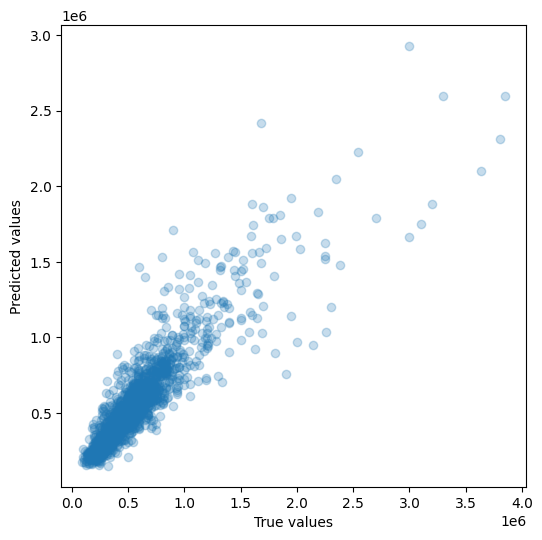

In [102]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, grid.best_estimator_.predict(X_test), alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

---
## Zum Schluss: der Test!

Sobald das passende Model und die passenden Parameter gefunden wurden, können Vorhersagen auf den unbekannten Test-Daten gemacht werden!

Diese befinden sich in der Datei `house_price_data_unknowns.csv`.

Der meiste Code dafür in den folgenden Zellen stehen.

In [103]:
filename = "data/house_price_data_unknowns.csv"

data_competition = pd.read_csv(filename).dropna()
data_competition.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3329500060,4,2.50,2250,9091,1.0,0,0,3,7,1340,910,1982,0,98001,47.3360,-122.269,1540,7802
1,1125059071,4,3.25,3340,10890,1.5,0,0,3,9,2240,1100,1963,2000,98052,47.6677,-122.136,2880,9794
2,3024079096,4,2.50,2600,118666,1.0,0,0,3,7,1400,1200,1981,0,98027,47.5400,-121.970,2440,131116
3,4442800008,3,2.00,1340,1480,3.0,0,0,3,8,1340,0,1997,0,98117,47.6904,-122.393,1340,1321
4,5101405604,1,1.00,900,6380,1.0,0,0,3,6,900,0,1947,0,98125,47.7019,-122.311,1830,6380


## Vorhersagen machen

In [104]:
data_competition.set_index("id", inplace=True)
data_competition_scaled = scaler.transform(data_competition)

In [105]:
predicted_prices = grid.best_estimator_.predict(data_competition_scaled)
predicted_prices

array([ 257970.0553012 , 1323406.4707102 ,  459052.31237705,
        403188.8624377 ,  350000.        ,  246707.85816808,
        446120.13040809,  627880.23483763,  443536.2718958 ,
        326063.98660999,  441173.39022743,  330571.88482161,
        316377.61167474,  421937.67212426,  306131.81046007,
        439024.39359153,  229933.73252371,  190303.67674697,
        484508.9918155 ,  244983.50960786,  482244.88402986,
        333542.3302992 ,  561060.3400338 ,  793656.21192375,
        656273.45633423,  677210.80465706,  523621.80052594,
       2050790.04016288,  851375.76048175,  300437.758522  ,
        784217.70956835,  513495.59961041,  289616.66864936,
        681290.48945965,  234816.03604645,  372469.21773241,
        192459.025888  ,  404597.4878708 ,  358110.61958394,
        488237.96318678,  636144.00369499,  488172.24740613,
        748183.27892795,  289090.76015061,  269439.07134336,
        965614.45984707, 1078082.48042896, 1726501.96020313,
        791275.971748  ,

## Fertige Ergebnisse erstellen
Hier ordnen wir nur die Vorhersagen den "id" zu.

In [107]:
competition_results = pd.DataFrame({"id": data_competition.index,
                                    "price": predicted_prices})
competition_results                                

,id,price
0,3329500060,2.579701e+05
1,1125059071,1.323406e+06
2,3024079096,4.590523e+05
3,4442800008,4.031889e+05
4,5101405604,3.500000e+05
...,...,...
95,1085622540,3.621659e+05
96,2895800750,2.801997e+05
97,7853230590,4.388595e+05
98,8563000770,4.862193e+05


## Ergebnisse abspeichern (& wenn fertig --> hochladen!)
- Versteht sich: Namen bitte anpassen!

In [109]:
filename = "house_price_predictions_philipp_konstantin.csv"

competition_results.to_csv(filename)

In [110]:
mean_absolute_error(y_test, grid.best_estimator_.predict(X_test))

86613.02082694045

### ... viel Erfolg!